# Root-finding polynomial algorithms

Compare the iterative method employed in the original fisheye pull-request with a more accurate Newton-Raphson

In [1]:
import numpy as np
import matplotlib.pyplot as plt

k1, k2, k3, k4 = 0.08309221636708493, 0.01112126630599195, 0.008587261043925865, 0.0008542188930970716  # Marcel values

def poly_correction(theta):
    return (1. + k1*theta**2 + k2*theta**4 + k3*theta**6 + k4*theta**8)

def kannala_brandt(theta):
    r = theta*poly_correction(theta)
    return r

def poly(theta, r):
    return r - kannala_brandt(theta)

def der_poly(theta):
    return - (1. + 3*k1*theta**2 + 5*k2*theta**4 + 7*k3*theta**6 + 9*k4*theta**8)
    
def newton_raphson(theta, r):
    return theta - poly(theta, r)/der_poly(theta)


n_iter = 26
rvec = np.linspace(0.,60,num=100)
theta_nr = []
theta_it = []

for r in rvec:

    # Newton-Raphson
    theta = r
    #theta = r/poly_correction(r)
    for i in range(n_iter):
        theta = newton_raphson(theta, r)
    theta_nr.append(theta)

    # Iterative method
    theta = r
    for i in range(n_iter):
        theta = r/poly_correction(theta)
    theta_it.append(theta)

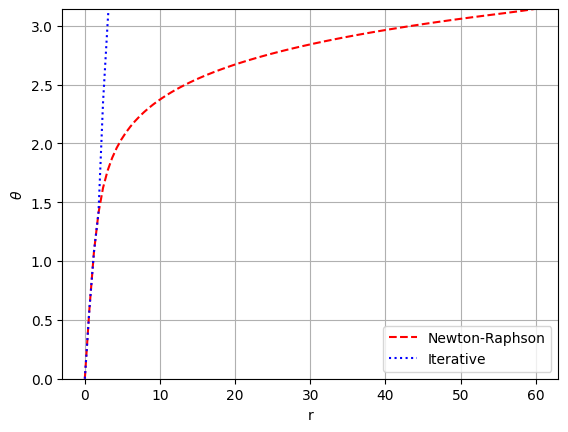

In [2]:
plt.plot(rvec, theta_nr, color="r", linestyle="--", label="Newton-Raphson")
plt.plot(rvec, theta_it, color="b", linestyle=":", label="Iterative")
plt.grid()
plt.xlabel("r")
plt.ylabel(r"$\theta$")
plt.ylim([0.,np.pi])
plt.legend()

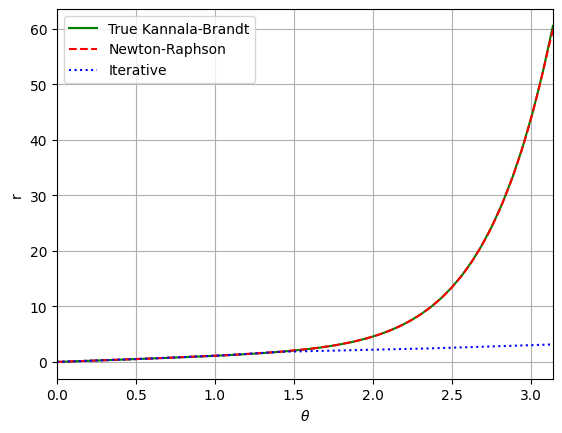

In [3]:
theta_vec = np.linspace(0,np.pi)
plt.plot(theta_vec, kannala_brandt(theta_vec), "g", label="True Kannala-Brandt")
plt.plot(theta_nr, rvec, color="r", linestyle="--", label="Newton-Raphson" )
plt.plot(theta_it, rvec, color="b", linestyle=":", label="Iterative")
plt.grid()
plt.ylabel("r")
plt.xlabel(r"$\theta$")
plt.xlim([0.,np.pi])
plt.legend()